# Netflix Titles - Full EDA Project

**Notebook contents:**
- Data load & initial inspection
- Missing values analysis
- Data cleaning (dates, duration parsing)
- Univariate analysis (genres, countries, types, ratings)
- Bivariate analysis (genre vs year, type vs duration)
- Time-series / catalog growth analysis
- Feature engineering suggestions
- Key insights & next steps



### Load libraries and the dataset

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\\HARSHITA\\Downloads\\archive\\netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### To get all the columns name

In [4]:

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### To get the shape (rows,columns)

In [5]:
print('Shape:', df.shape)

Shape: (8807, 12)


### Intial Data analysis

In [6]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Quick info : datatypes of all the columns

In [7]:
print('Columns and dtypes:')
print(df.dtypes)


Columns and dtypes:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


### Data Cleaning : Fixing Column Names & Parsing Dates

In [8]:
df.columns = [c.strip() for c in df.columns]

df['date_added_parsed'] = pd.to_datetime(df['date_added'], errors='coerce')

print('Parsed date_added: nulls =', df['date_added_parsed'].isna().sum())

df[['date_added','date_added_parsed']].head(8)


Parsed date_added: nulls = 98


,date_added,date_added_parsed
0,"September 25, 2021",2021-09-25
1,"September 24, 2021",2021-09-24
2,"September 24, 2021",2021-09-24
3,"September 24, 2021",2021-09-24
4,"September 24, 2021",2021-09-24
5,"September 24, 2021",2021-09-24
6,"September 24, 2021",2021-09-24
7,"September 24, 2021",2021-09-24


### Basic counts : type 

In [9]:
print('Content type counts:')
print(df['type'].value_counts(dropna=False))



Content type counts:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


### Country analysis: split 'country' into individual countries and count

In [10]:
df['country_clean'] = df['country'].fillna('Unknown')
countries = df['country_clean'].str.split(',').explode().str.strip()
country_counts = countries.value_counts().reset_index()
country_counts.columns = ['country','count']
country_counts.head(20)


,country,count
0,United States,3690
1,India,1046
2,Unknown,831
3,United Kingdom,806
4,Canada,445
5,France,393
6,Japan,318
7,Spain,232
8,South Korea,231
9,Germany,226


### Movie vs TV Show Count Pie Chart

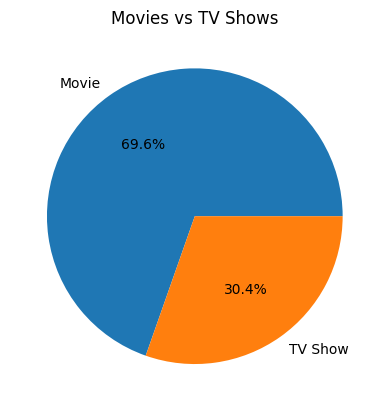

In [11]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Movies vs TV Shows')
plt.ylabel('')
plt.show()


### Distribution of Ratings 

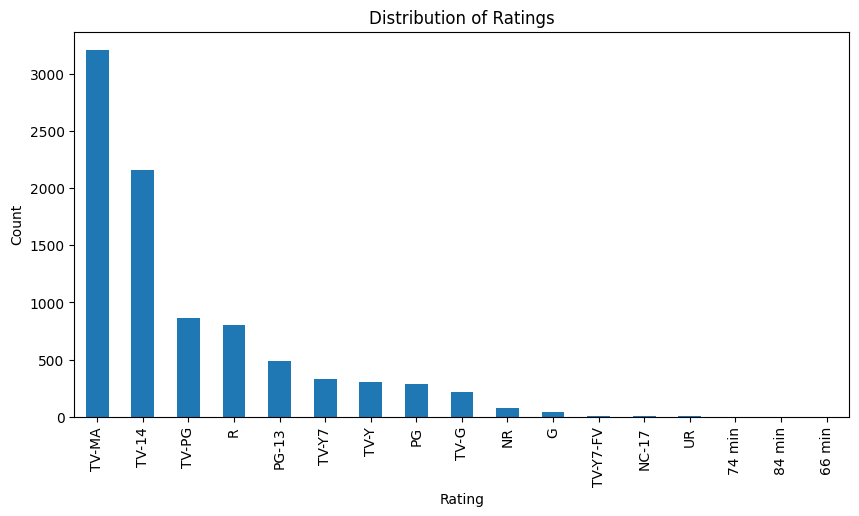

In [12]:
plt.figure(figsize=(10,5))
df['rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


### Plot top 15 countries

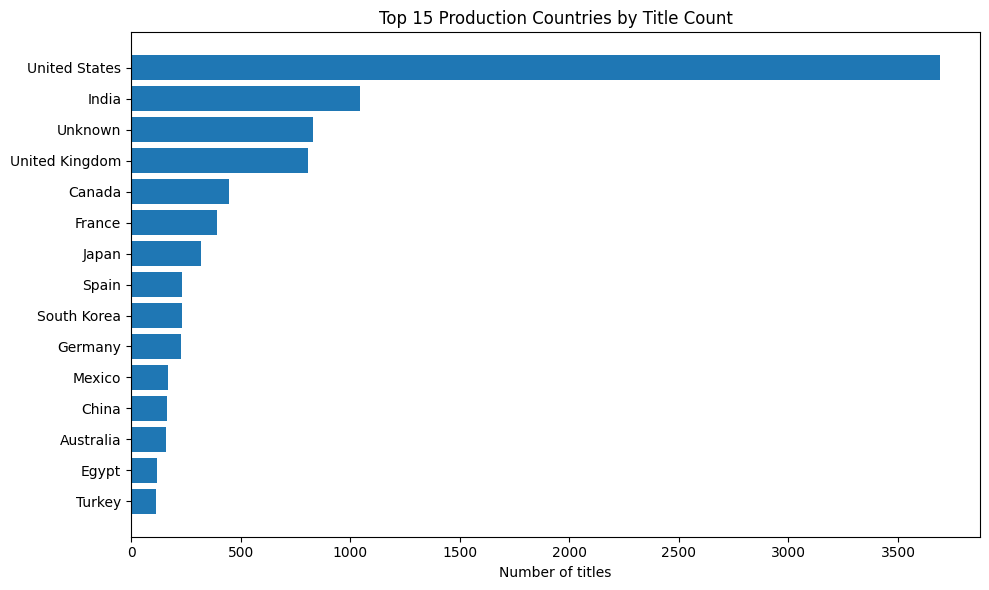

In [13]:
top_countries = country_counts.head(15)
plt.figure(figsize=(10,6))
plt.barh(top_countries['country'][::-1], top_countries['count'][::-1])
plt.title('Top 15 Production Countries by Title Count')
plt.xlabel('Number of titles')
plt.tight_layout()
plt.show()


### Release year distribution

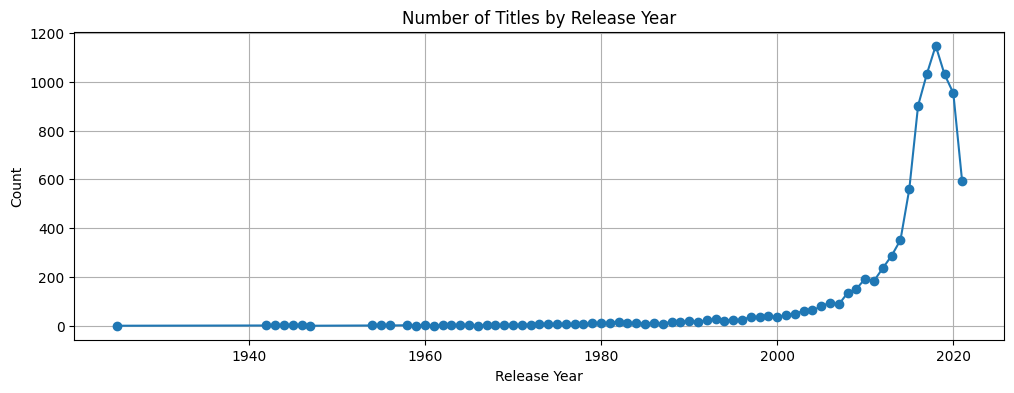

In [14]:
release_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,4))
plt.plot(release_counts.index, release_counts.values, marker='o')
plt.title('Number of Titles by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()


### Titles added to Netflix by year (from date_added_parsed)

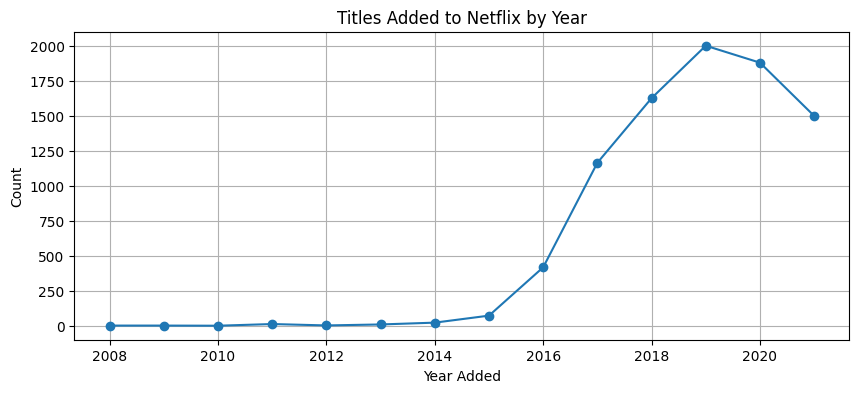

In [15]:
df['year_added'] = df['date_added_parsed'].dt.year

added_counts = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,4))
plt.plot(added_counts.index, added_counts.values, marker='o')
plt.title('Titles Added to Netflix by Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.grid(True)
plt.show()


# Conclusion

1. Imported libraries → Loaded all required packages for EDA.
2. Loaded dataset → Read Netflix CSV into DataFrame for analysis.
3. Cleaned column names → Removed extra spaces for consistency.
4. Parsed dates → Converted date_added to proper datetime.
5. Checked nulls → Identified missing values for cleaning steps.
6. Univariate plots → Visualized distribution of key features.
7. Correlation analysis → Checked relationships between numeric fields.
